# Neighborhood enrichment test on points data

This tutorial explains how to conduct a neighborhood enrichment test (see [Wählby et al. (2022)](https://www.frontiersin.org/articles/10.3389/fphys.2022) for explanation) with napari-spatial-statistics. This function uses the [Squidpy](https://squidpy.readthedocs.io/en/stable/index.html) spatial statistics platform.

In [1]:
import napari 
import napari_spatial_statistics as nss
import matplotlib.pyplot as plt

In [2]:
points = nss.make_random_points(n_points=1000, n_classes=2, spatial_size=1000, randomness=3, dim=3)

This shows the created point distribution. The locations of the created points are  obviously correlated:

Assistant skips harvesting pyclesperanto as it's not installed.


C:\Users\johan\anaconda3\envs\napari-spatial-statistics\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
C:\Users\johan\anaconda3\envs\napari-spatial-statistics\lib\site-packages\numpy\core\numeric.py:2453: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


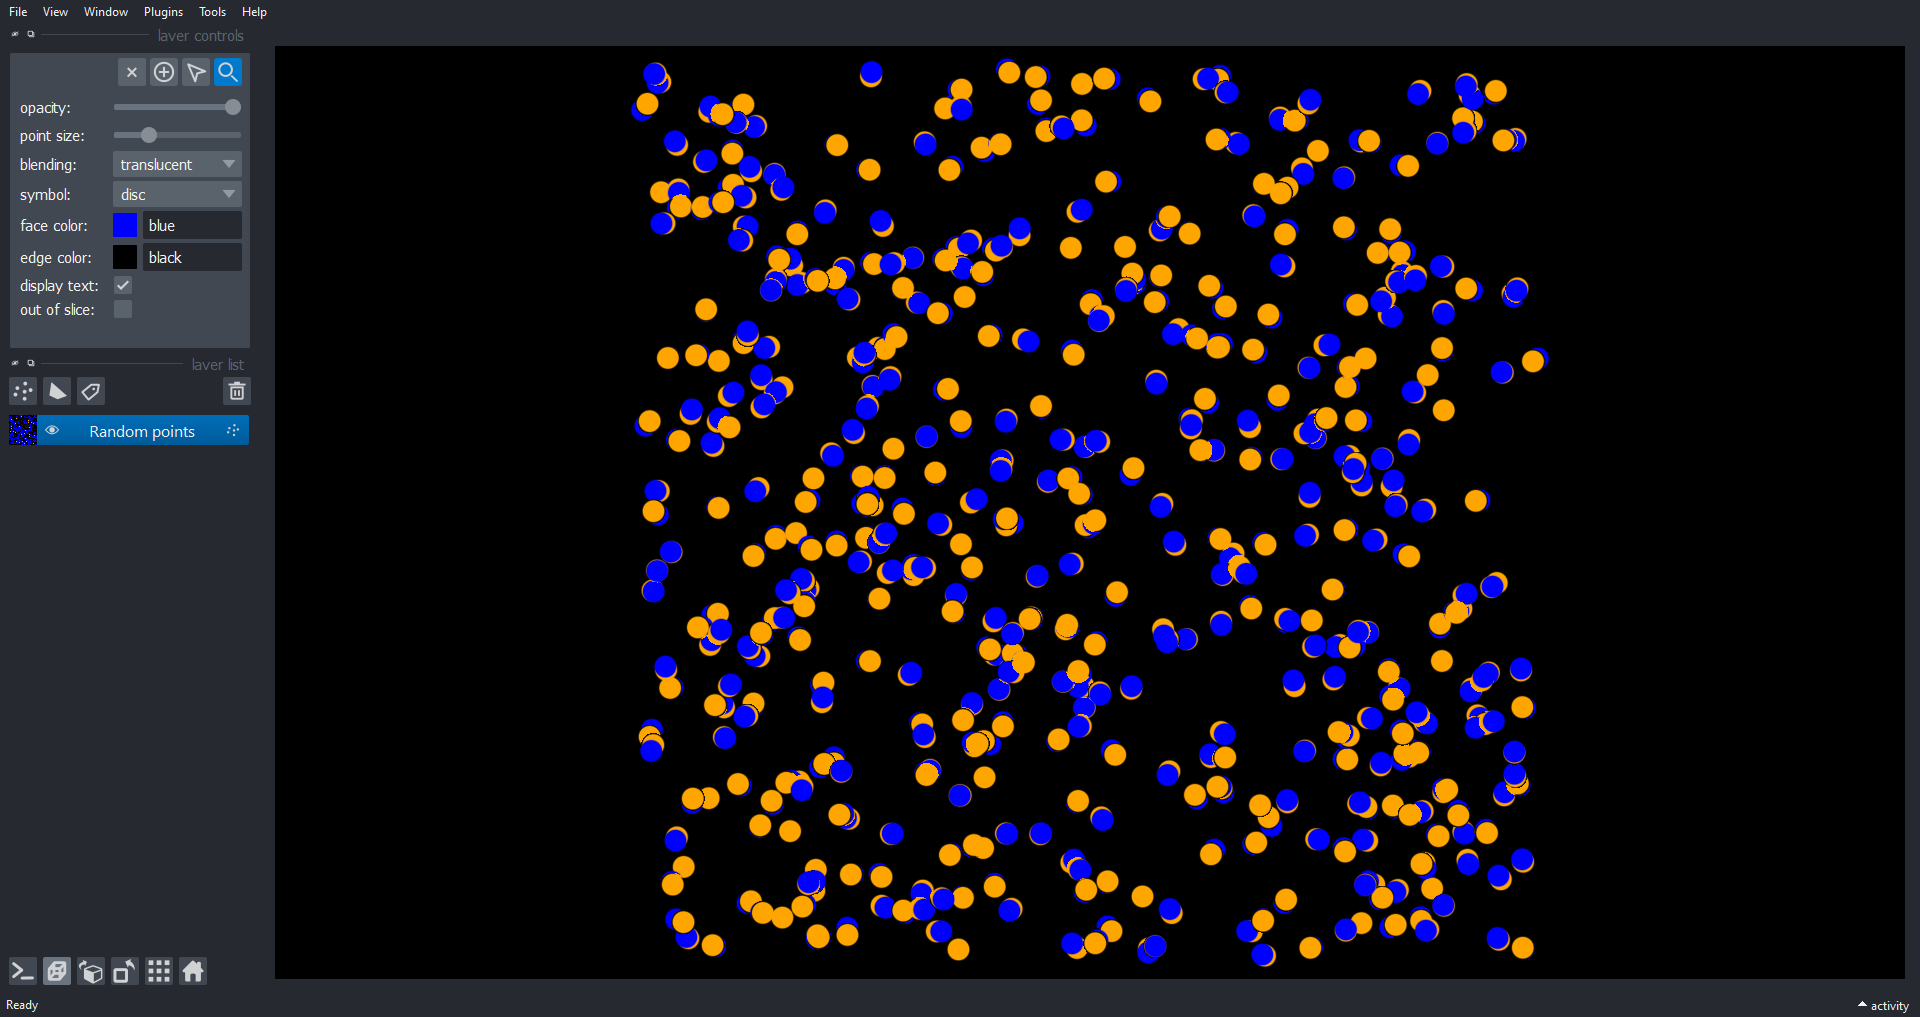

In [3]:
viewer = napari.Viewer(ndisplay=3)
pts_layer = viewer.add_points(points[0], **points[1])
napari.utils.nbscreenshot(viewer, canvas_only=False)

First, we need to define a neighborhood criteria between points. This will determine which set of points will be considered to be neighbors of each other - and which aren't. Napari-spatial-statistics provides a set of functions for this:

* `nss.distance_ckdtree()`: Distance-based neighborhood implemented in [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html)
* `nss.distance_squidpy()`: Distance-based neighborhood implement in [Squidpy](https://squidpy.readthedocs.io/en/stable/auto_examples/graph/compute_spatial_neighbors.html)
* `nss.knearest_ckdtree()`: N-nearest neighbors implemented in [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.query.html#scipy.spatial.cKDTree.query)

*Note*: These functions operate on `napari.layer.Points` types, since the required point type information and the determined neighborhood information are store in `layer.properties`

C:\Users\johan\anaconda3\envs\napari-spatial-statistics\lib\site-packages\numpy\core\numeric.py:2453: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


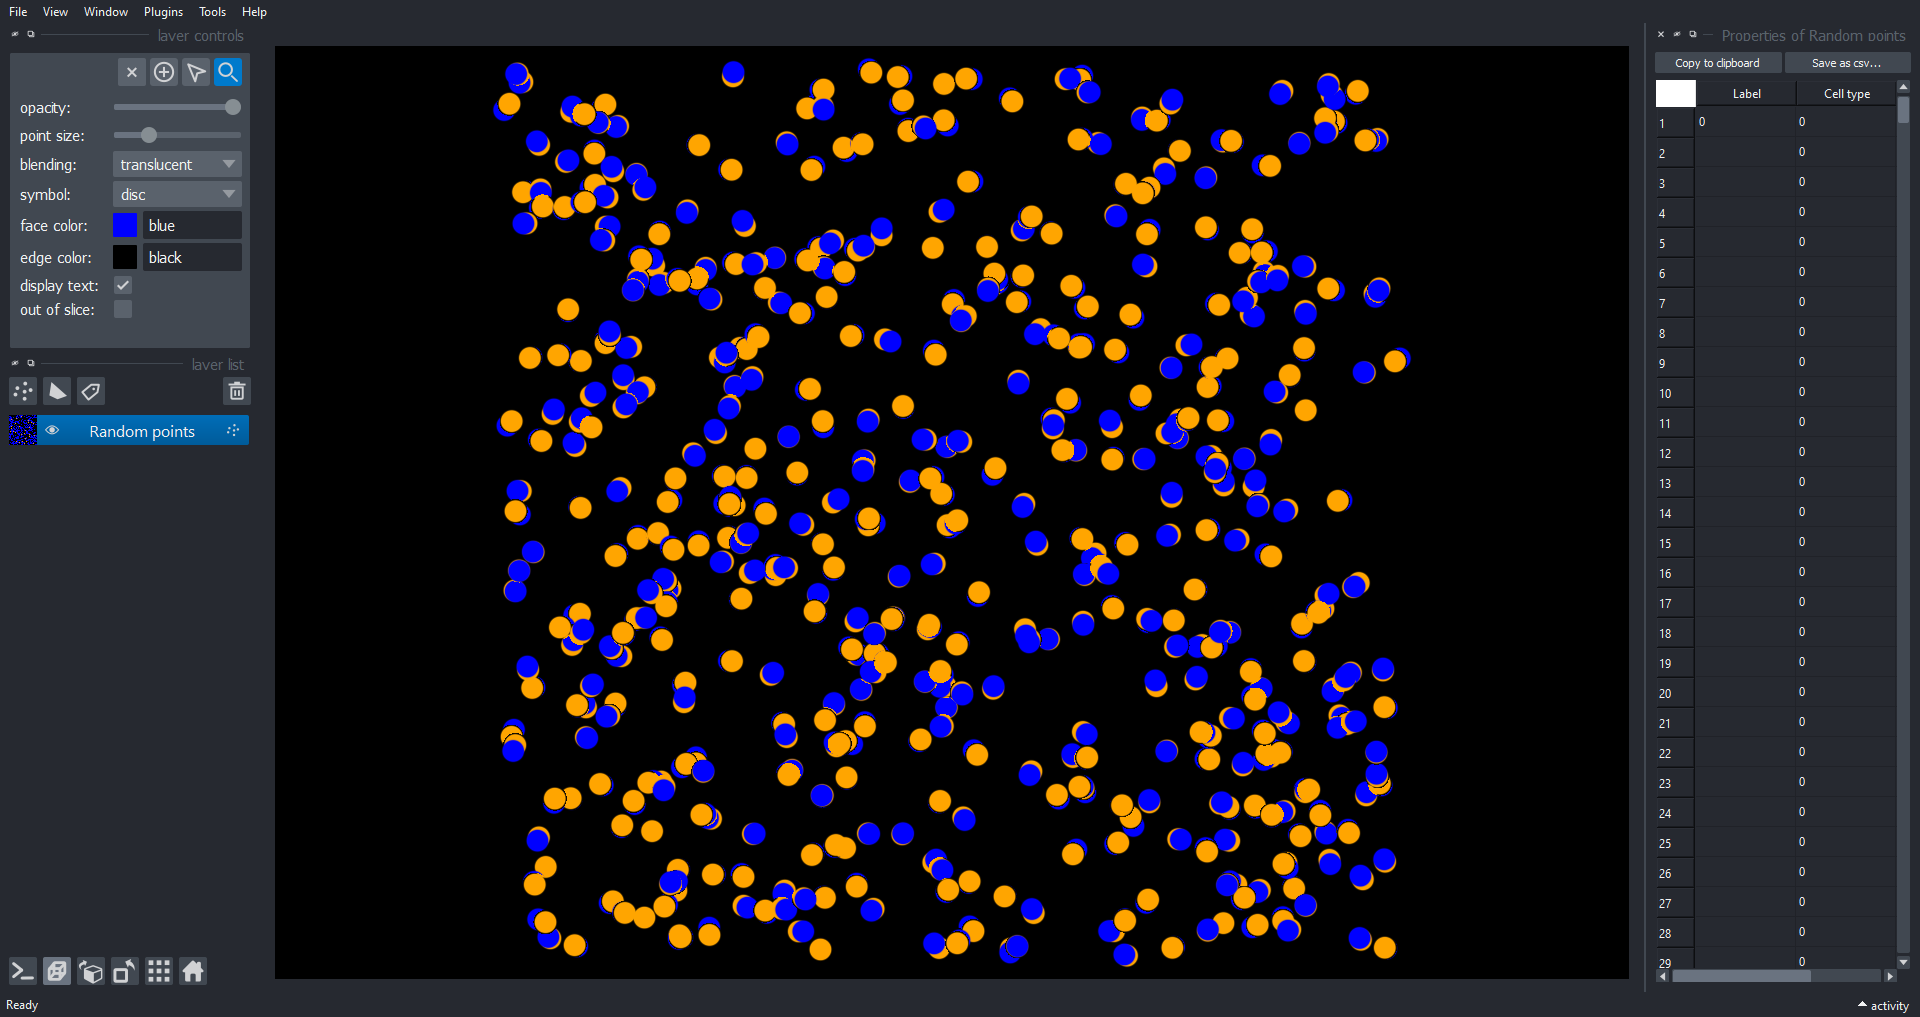

In [4]:
properties = nss.distance_ckdtree(points, radius=10, viewer=viewer)  # viewer parameter is optional, but creates a table to show list of neighboring points
napari.utils.nbscreenshot(viewer, canvas_only=False)

  0%|          | 0/1000 [00:00<?, ?/s]

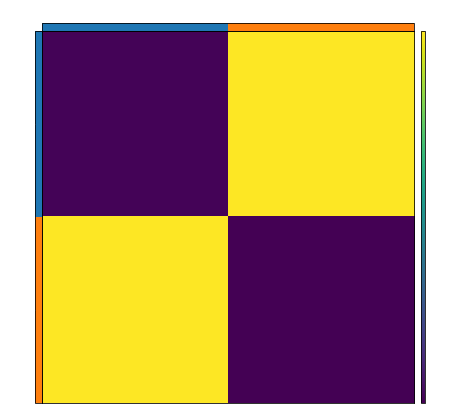

In [5]:
fig, ax = plt.subplots(figsize=(7,7))
results = nss.neighborhood_enrichment_test(points[0], properties=properties, on_feature='Cell type', n_permutations=1000, ax=ax)

This tells us that we are finding *a lot* of type `2` cells in the neighborhood of type `1` cells and vice versa as compared to what we would expect if the point identities were distributed randomly. We can now repeat this analysis and add more randomness to the data:

C:\Users\johan\anaconda3\envs\napari-spatial-statistics\lib\site-packages\numpy\core\numeric.py:2453: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


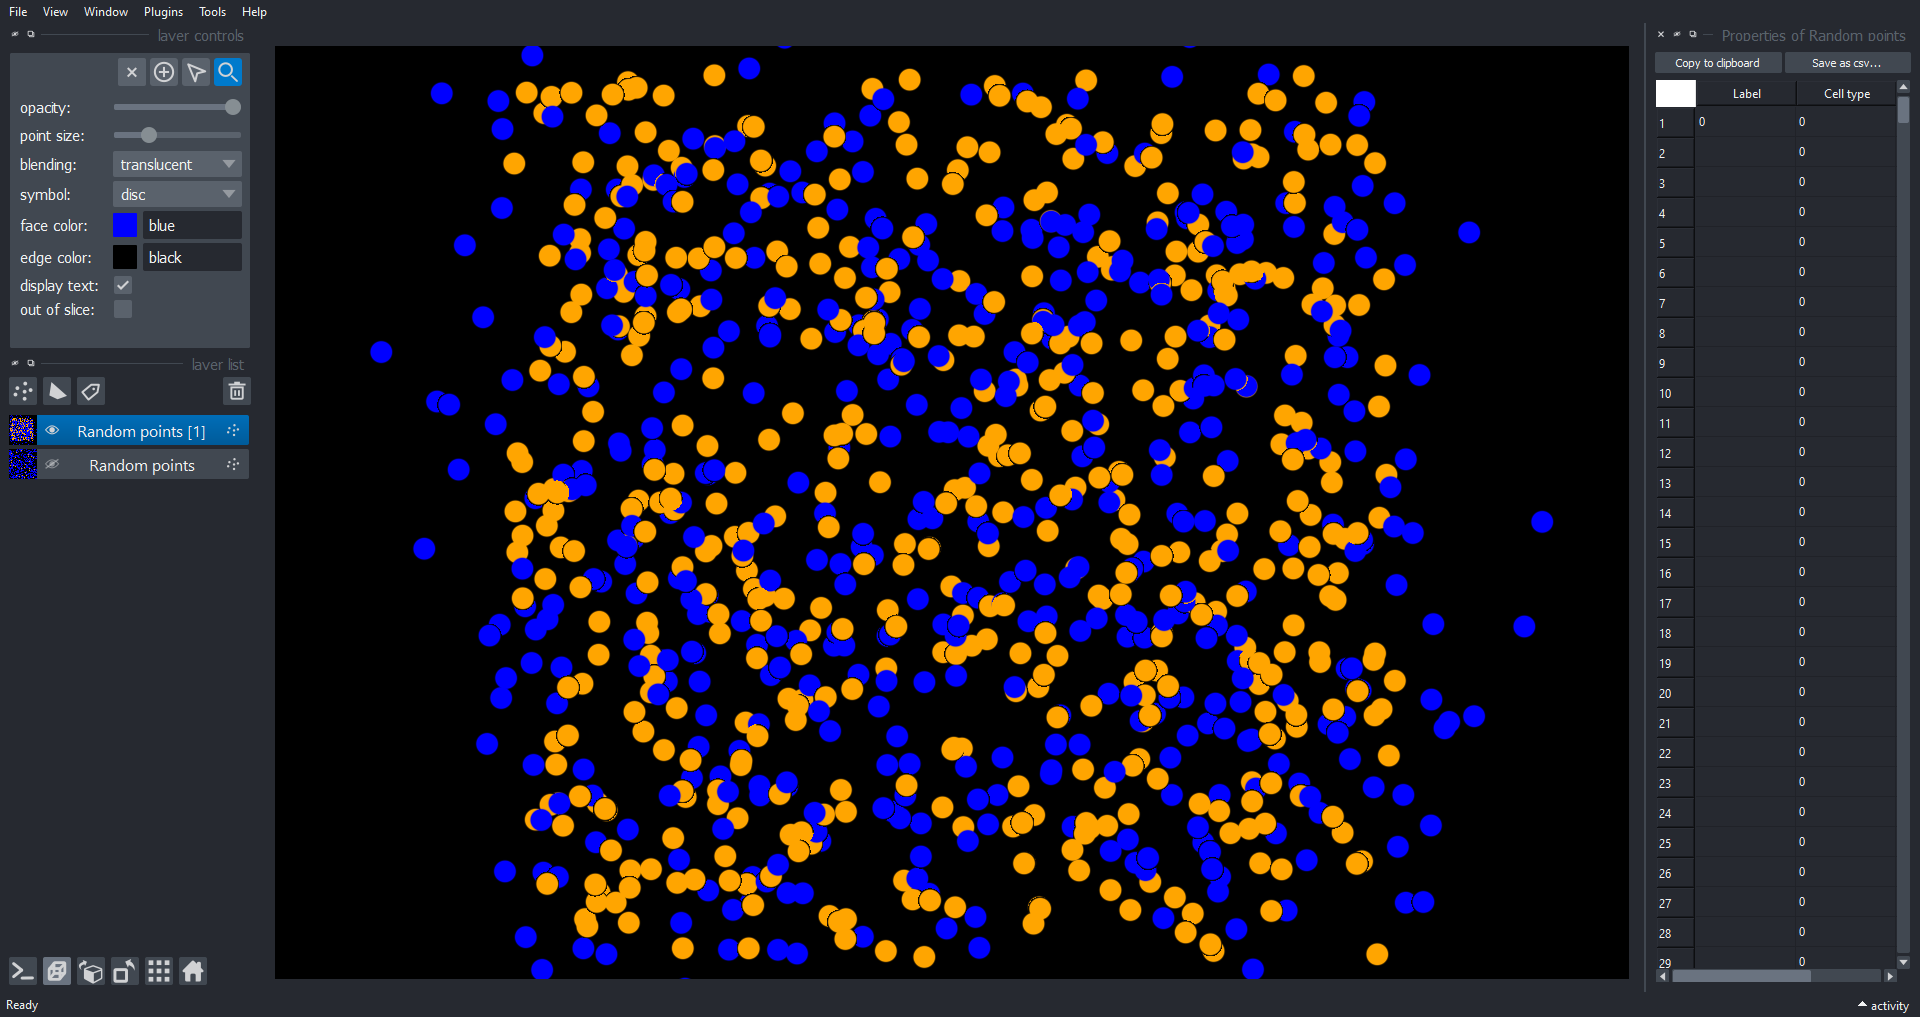

In [6]:
pts_layer.visible=False
points = nss.make_random_points(n_points=1000, n_classes=2, spatial_size=1000, randomness=100, dim=3)
viewer.add_points(points[0], **points[1])
napari.utils.nbscreenshot(viewer, canvas_only=False)

C:\Users\johan\anaconda3\envs\napari-spatial-statistics\lib\site-packages\numpy\core\numeric.py:2453: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


  0%|          | 0/1000 [00:00<?, ?/s]

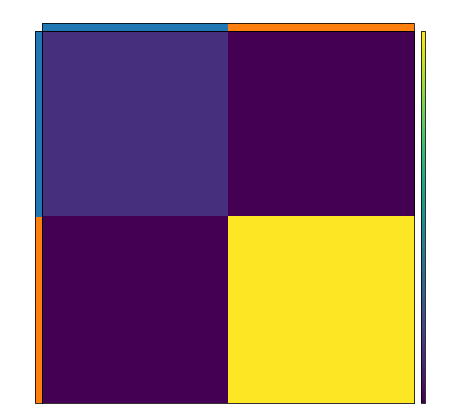

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
properties = nss.distance_ckdtree(points, radius=10, viewer=viewer)  # viewer parameter is optional, but creates a table to show list of neighboring points
results = nss.neighborhood_enrichment_test(points[0], properties=properties, on_feature='Cell type', n_permutations=1000, ax=ax)

We now see lower z-scores close to zero (note the colorbar on the right-hand site) which indicates that the presence of type `2` cells in the neighborhoood of type `1` cells (and vice versa) is close to random. You can retrieve the raw z-score values from the `results` variable with:

In [8]:
results['zscore']

array([[-0.59737099, -0.968496  ],
       [-0.968496  ,  1.71830416]])